In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
from scipy import signal
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import IPython.display as ipd
import librosa
%matplotlib inline

In [49]:
fs, audio    = wavfile.read('A.wav') #   Blowing towards the mic., noise

ipd.display(ipd.Audio(audio, rate=fs))

In [50]:
def plot_spectrogram(audio, fs, tstart, tstop):
    f, t, Zxx = signal.stft(audio, fs, window ='hann', nperseg=480)

    f_ind = (f<=10000)
    t_ind = ((t >=tstart) & (t <=tstop))
    z_ind = np.ix_(f_ind, t_ind)

    Zabs_cropped = np.abs(Zxx[z_ind])
    Zabs_cropped = Zabs_cropped / np.max(Zabs_cropped)

    fig, ax = plt.subplots(figsize=(9, 6))

    # create the spectrogram
    im = ax.pcolormesh(t[t_ind], f[f_ind], 20*np.log10(Zabs_cropped), shading='gouraud', vmin = -50, vmax = 0, cmap = 'jet')
    ax.set_ylim([0,10000])

    ax.set_title('STFT Sqrt. Magnitude')
    ax.set_ylabel('Frequency [Hz]')
    ax.set_xlabel('Time [sec]')
    plt.show()

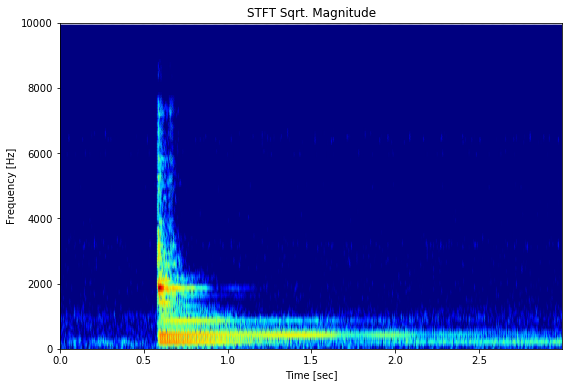

In [46]:
plot_spectrogram(audio, fs, 0, 3)